In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from IPython import display
from scipy import stats
import statsmodels

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('bank-full.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape

(45211, 17)

There are a total of 45211 rows & 17 columns in the given dataset.

There are a significant columns with 'object' data type while others have a numeric data type

__Exploring the data__

In [8]:
# Converting all the 'object' features to 'Category'

df[['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']] = df[['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']].apply(pd.Categorical)

df.dtypes.to_frame('Attributes')

,Attributes
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


10 features have now been converted to 'Category'.

7 continue to be numerical.

In [9]:
# Checking for 'NaN' values in the dataset.

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

The dataset has no 'NaN' values.

In [10]:
# Checking the statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Summary :
    
    Ouliers are observed in 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous' columns.
    
    The data in 'balance', 'duration', 'pdays' & 'previous' is rightly skewed.
    
    The min age, having an account is 18 whereas max is 95.
    
    The balance maintained in the account also vaires from the min of -8019 to as much as max of 102127.

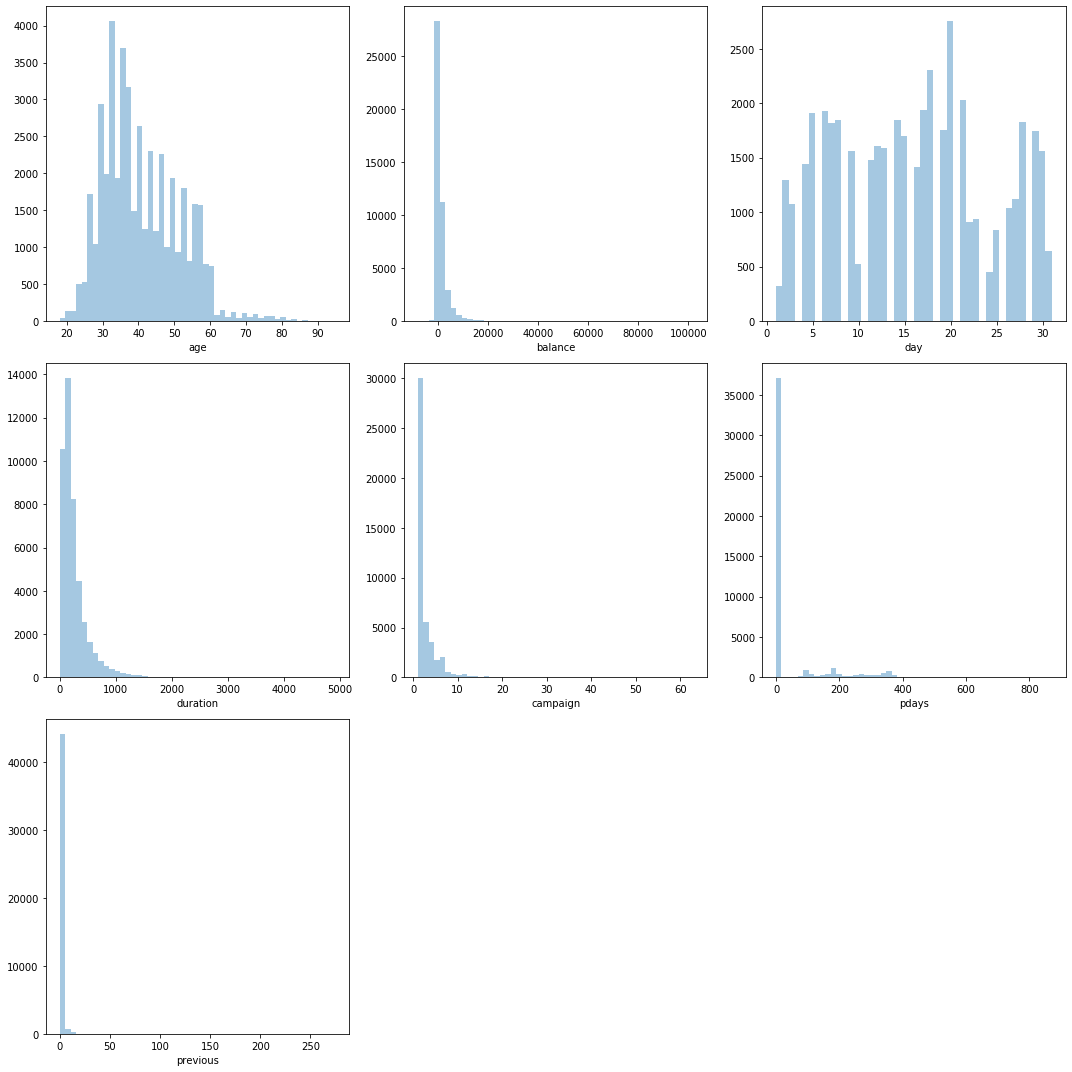

In [11]:
# Plotting the distribution of all numerical data.

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.distplot(df['age'], kde=False)

plt.subplot(3,3,2)
sns.distplot(df['balance'], kde=False)

plt.subplot(3,3,3)
sns.distplot(df['day'], kde=False)

plt.subplot(3,3,4)
sns.distplot(df['duration'], kde=False)

plt.subplot(3,3,5)
sns.distplot(df['campaign'], kde=False)

plt.subplot(3,3,6)
sns.distplot(df['pdays'], kde=False)

plt.subplot(3,3,7)
sns.distplot(df['previous'], kde=False)

plt.tight_layout()
plt.show()

# Getting a kde bandwidth error. Hence kept it to 'False'.

Plot Summary :
    
    The 'age' plot shows an almost bell curve, indicating a somewhat normal data distribution.
    
    The 'balance', 'duration', 'campaign' shows a rightly skewed distribution.

In [12]:
# Verifying the skewness of the data.

df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].skew().to_frame('Skewness').T

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

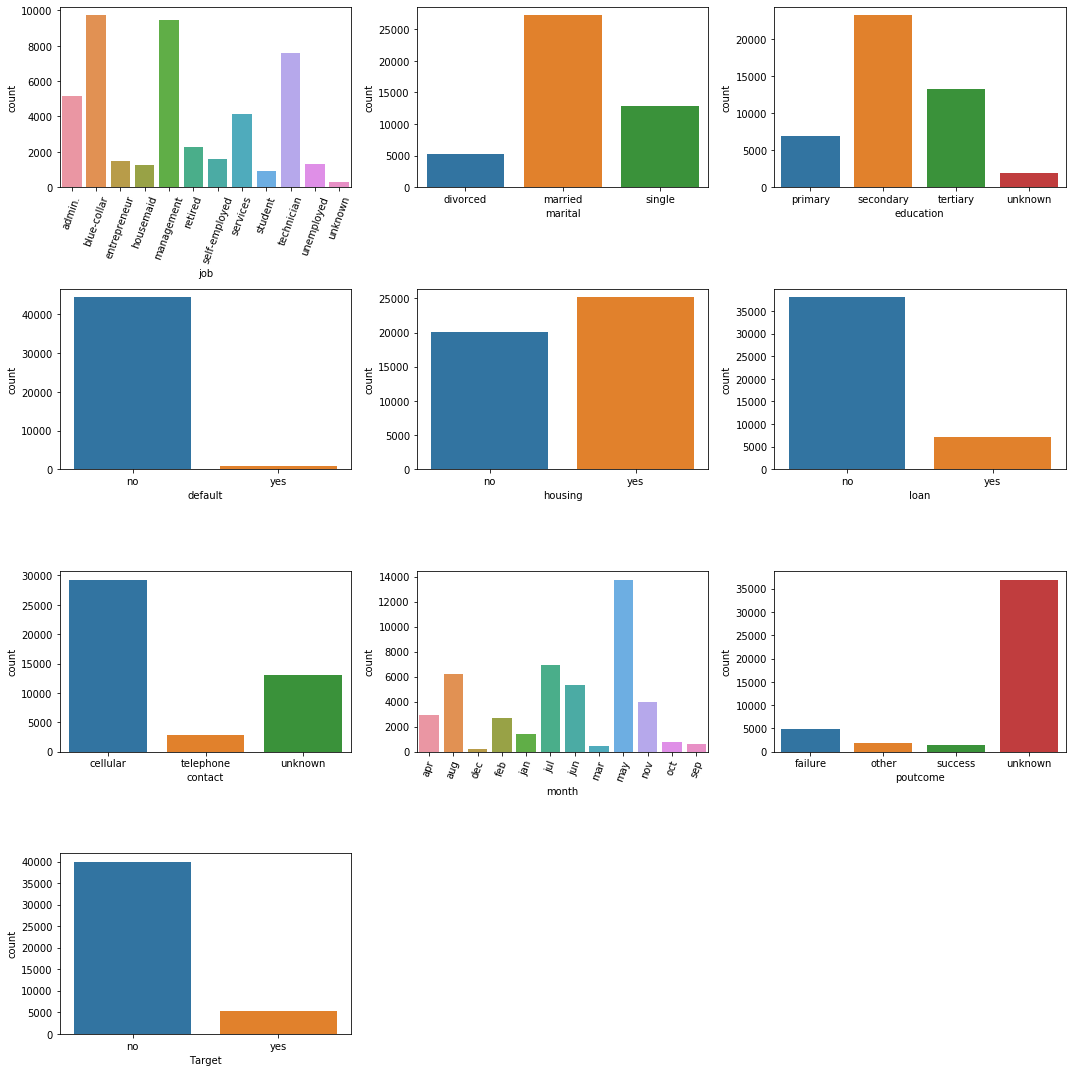

In [14]:
# PLotting the distribution of non-numerical data or categorical data.

plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
sns.countplot(x=df['job'], data=df)
plt.xticks(rotation=70)

plt.subplot(4,3,2)
sns.countplot(x=df['marital'], data=df)

plt.subplot(4,3,3)
sns.countplot(x=df['education'], data=df)

plt.subplot(4,3,4)
sns.countplot(x=df['default'], data=df)

plt.subplot(4,3,5)
sns.countplot(x=df['housing'], data=df)

plt.subplot(4,3,6)
sns.countplot(x=df['loan'], data=df)

plt.subplot(4,3,7)
sns.countplot(x=df['contact'], data=df)

plt.subplot(4,3,8)
sns.countplot(x=df['month'], data=df)
plt.xticks(rotation=70)

plt.subplot(4,3,9)
sns.countplot(x=df['poutcome'], data=df)

plt.subplot(4,3,10)
sns.countplot(x=df['Target'], data=df)

plt.tight_layout()
plt.show()

Plot Summary :
    
    Most people haven't defaulted and do not have any personal 'loan'.
    
    Most people have been contacted by 'cellular'.
    
    The highest number of contact took place in 'May'.
    
    Most number of people don't have a term deposit.

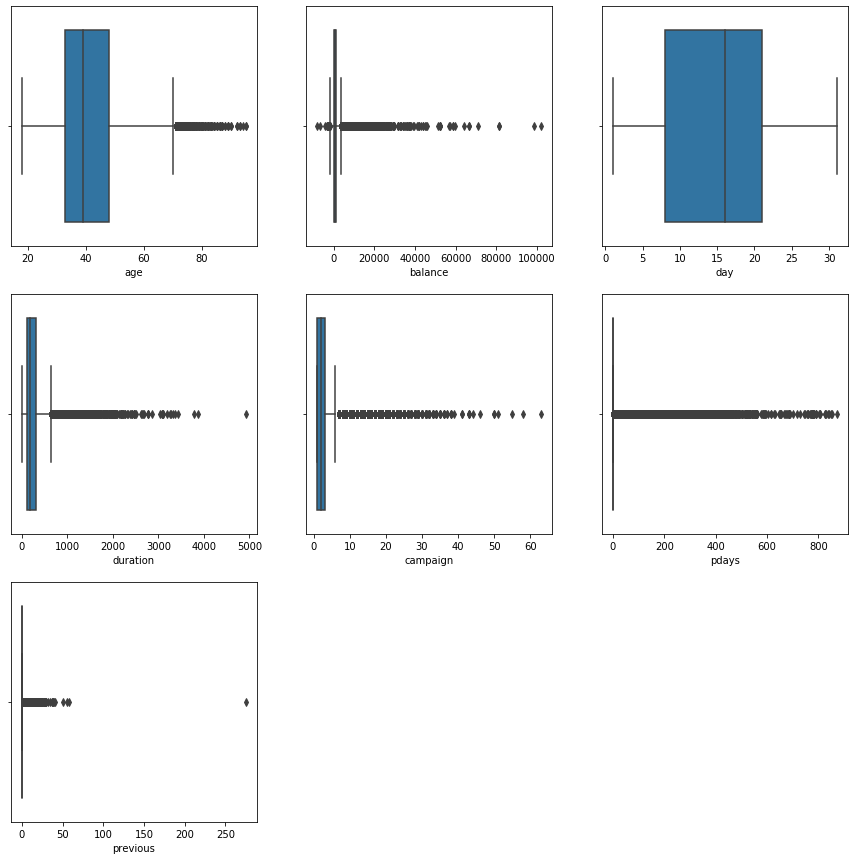

In [15]:
# Checking the Outliers.

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.boxplot(x=df['age'], data=df)

plt.subplot(3,3,2)
sns.boxplot(x=df['balance'], data=df)

plt.subplot(3,3,3)
sns.boxplot(x=df['day'], data=df)

plt.subplot(3,3,4)
sns.boxplot(x=df['duration'], data=df)

plt.subplot(3,3,5)
sns.boxplot(x=df['campaign'], data=df)

plt.subplot(3,3,6)
sns.boxplot(x=df['pdays'], data=df)

plt.subplot(3,3,7)
sns.boxplot(x=df['previous'], data=df)

Plot Summary :
    
    Some outliers are observed in 'age' column.
    
    A significant amount of outliers are observed in 'balance', 'duration', 'campaign', 'previous' column as also more than significant amount of ouliers in 'pdays'.
    
    The 'balance' column shows some negative values as well.
    
    There are no outliers observed in 'day' column.

In [16]:
# Checking the categorical data and applying LabelEncoder on whichever feature variable considered important.
le = LabelEncoder()

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [18]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [19]:
df['marital'] = le.fit_transform(df['marital'])
df['marital'].unique()

array([1, 2, 0])

In [20]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [21]:
df['education'] = le.fit_transform(df['education'])
df['education'].unique()

array([2, 1, 3, 0])

In [22]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [23]:
df['default'] = le.fit_transform(df['default'])
df['default'].unique()

array([0, 1])

In [24]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [25]:
df['housing'] = le.fit_transform(df['housing'])
df['housing'].unique()

array([1, 0])

In [26]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [27]:
df['loan'] = le.fit_transform(df['loan'])
df['loan'].unique()

array([0, 1])

In [28]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [29]:
df['month'] = le.fit_transform(df['month'])
df['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [30]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [31]:
df['poutcome'] = le.fit_transform(df['poutcome'])
df['poutcome'].unique()

array([3, 0, 1, 2])

In [32]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [33]:
df['Target'] = le.fit_transform(df['Target'])
df['Target'].unique()

array([0, 1])

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


Columns such as 'job' & 'contact' can be ignored as its got no significant bearing on the term deposit or 'Target' variable.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [36]:
# Replacing the outliers values of the dataset with the respective mean of the column concerned.

df['balance'] = np.where(df['balance'] > np.percentile(df['balance'], 75), df['balance'].mean(), df['balance'])

df['duration'] = np.where(df['duration'] > np.percentile(df['duration'], 75), df['duration'].mean(), df['duration'])

df['campaign'] = np.where(df['campaign'] > np.percentile(df['campaign'], 75), df['campaign'].mean(), df['campaign'])

df['pdays'] = np.where(df['pdays'] > np.percentile(df['campaign'], 75), df['pdays'].mean(), df['pdays'])

df['previous'] = np.where(df['previous'] > np.percentile(df['previous'], 75), df['previous'].mean(), df['previous'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

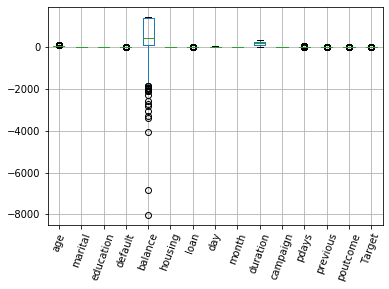

In [37]:
# Verify whether any outlier data is observed using boxplot

df.boxplot()
plt.xticks(rotation=70)

Only the negative balance as outlier is observed in 'balance' column.

'Age' values having outliers are kept as it is.

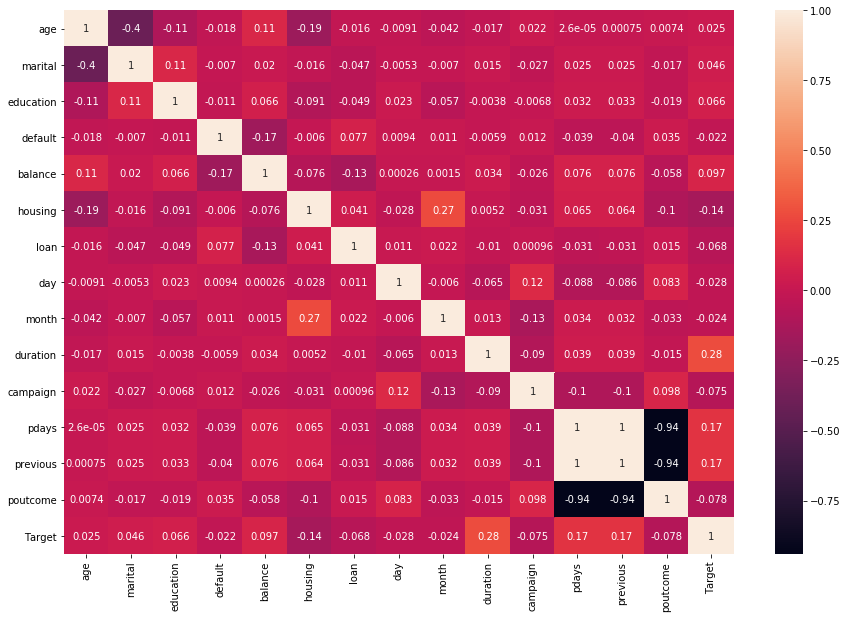

In [38]:
# Checking the correlation among the various feature variables.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

The columns 'pdays' and 'previous' are highly correlated.

Analysis Summary :
    
    Features like 'job', 'education', 'contact' have many 'unknown' values. Hence they are ignored from further analysis of model building.
    
    Feature 'poutcome' also has many 'unknown' values but it is retained as the outcome of previous campaign could be useful in model building.
    
    The 'duration' feature is discarded as it is only a benchmark feature not to be evaluated during model building.
    
    The features 'pdays' and 'previous' are highly correlated and hence are also not used.
    
    Other features like 'day' and 'month' do not have any impact on possibility of opening a term deposit account and hence are also ignored from further model building excercise.

In [39]:
df1 = df.drop(['job', 'education', 'contact', 'duration', 'pdays', 'previous', 'day', 'month'], axis=1)

df1.head()

,age,marital,default,balance,housing,loan,campaign,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,3,0
1,44,2,0,29.000000,1,0,1.0,3,0
2,33,1,0,2.000000,1,1,1.0,3,0
3,47,1,0,1362.272058,1,0,1.0,3,0
4,33,2,0,1.000000,0,0,1.0,3,0


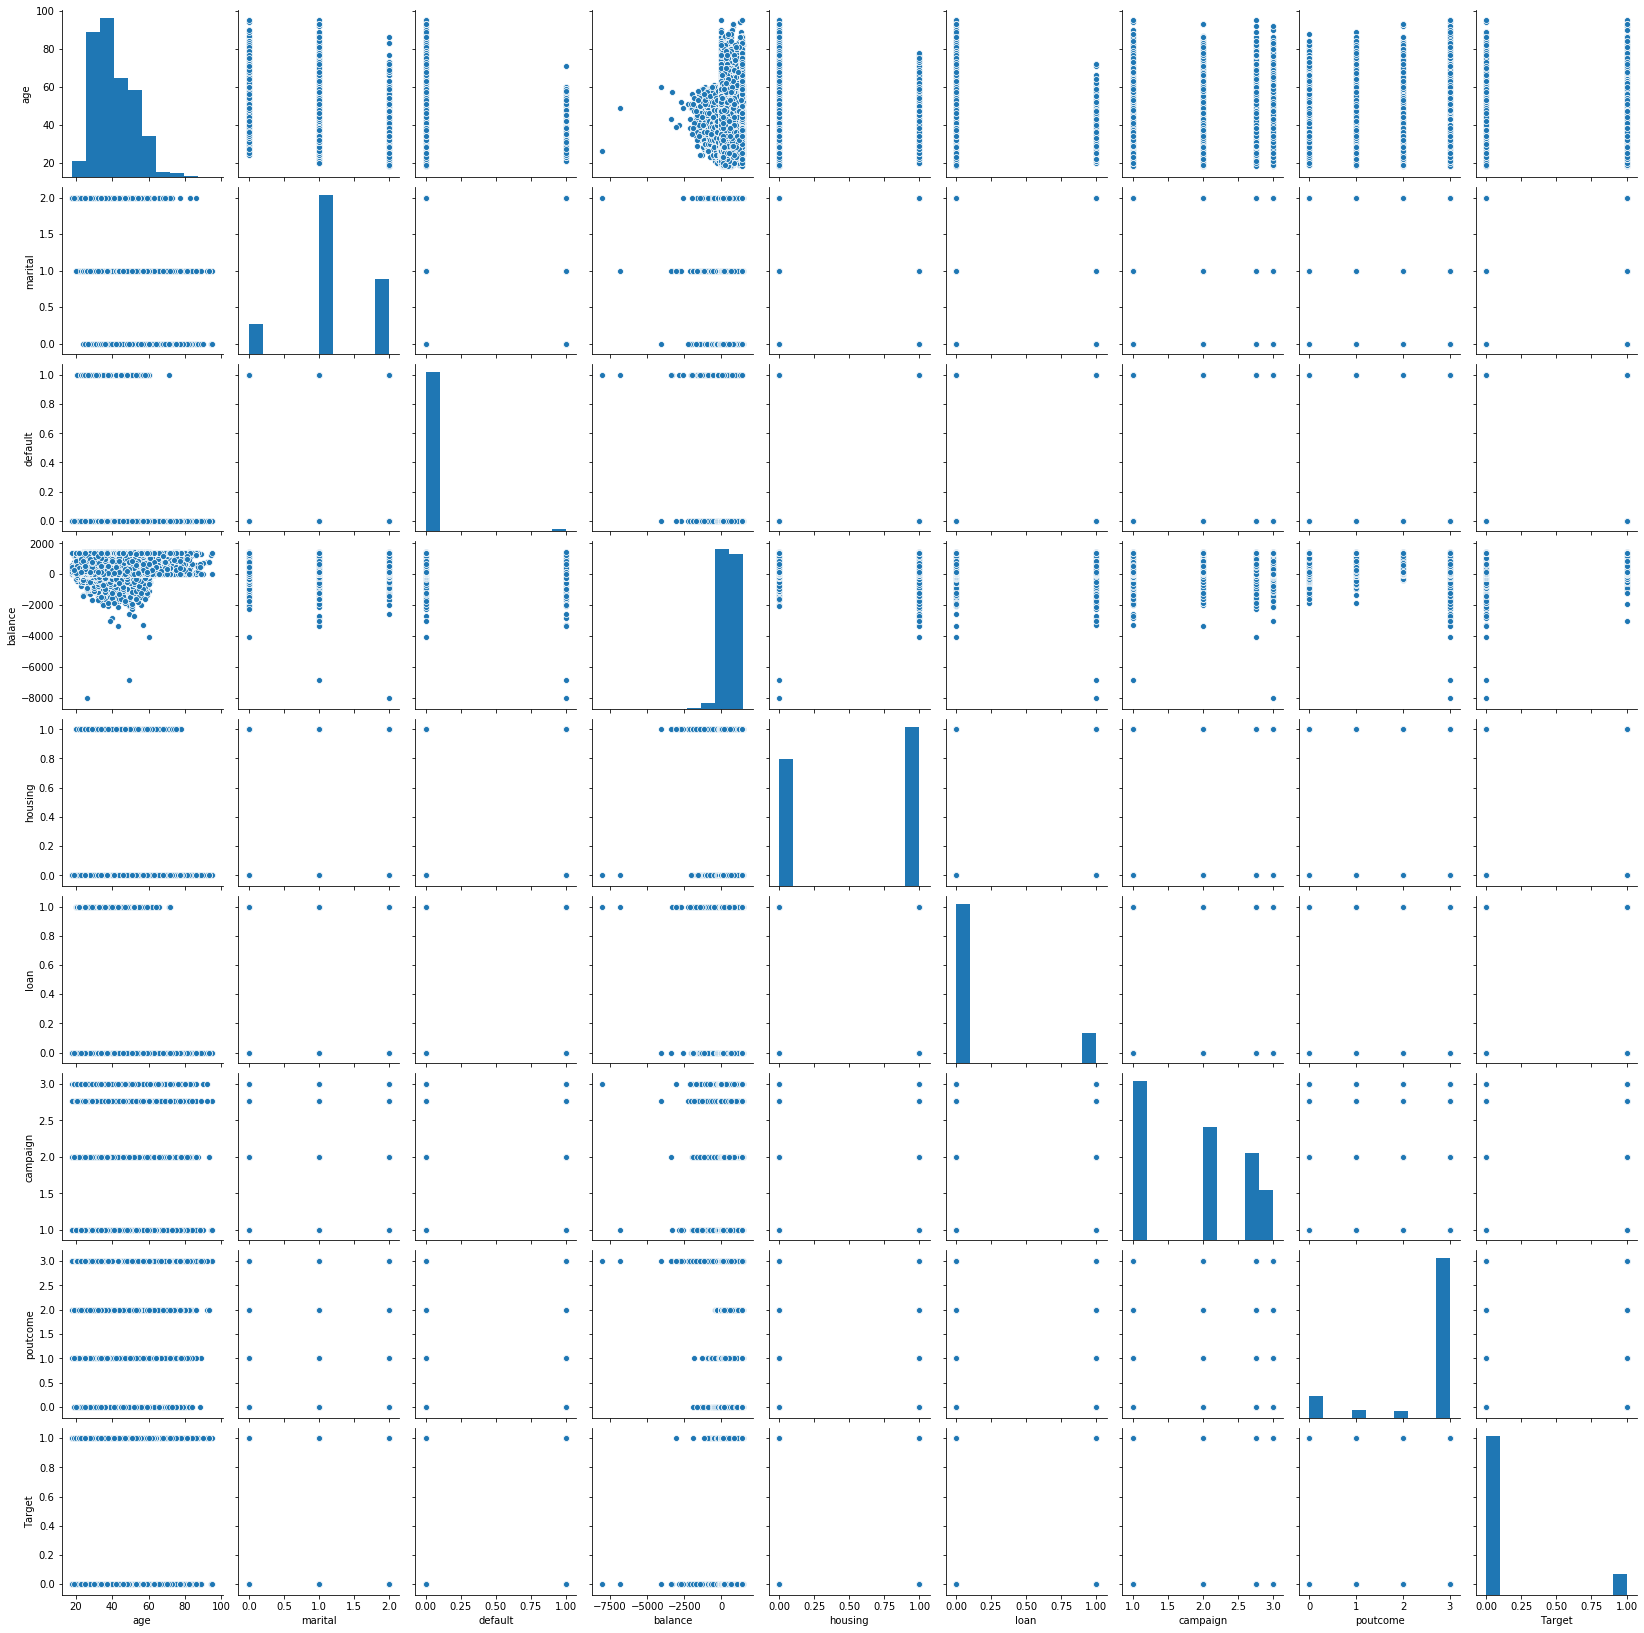

In [40]:
sns.pairplot(df1)

In [41]:
# Split the dataset into X and y for IDV and DV resp.

X = df1.drop(['Target'], axis=1)
y = df1['Target']

In [42]:
X.shape

(45211, 8)

In [43]:
y.shape

(45211,)

In [44]:
# Using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
X_train.shape

(31647, 8)

In [46]:
y_train.shape

(31647,)

In [47]:
# Using StandardScalar to bring down the variation in IDV dataset.

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [48]:
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.fit_transform(X_test)

__Building Models__

In [49]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
lr.fit(X_train_scalar, y_train)
y_pred_lr = lr.predict(X_test_scalar)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, classification_report

In [52]:
print('------------Logistic Regression------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_lr))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_lr))

------------Logistic Regression------------

The accuracy score of this model is : 0.89

Confusion Matrix :

[[12013     0]
 [ 1551     0]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.00      0.00      0.00      1551

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.89      0.83     13564



In [53]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()

In [54]:
gNB.fit(X_train_scalar, y_train)
y_pred_NB = gNB.predict(X_test_scalar)

In [55]:
print('------------Naive Bayes------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_NB)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_NB))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_NB))

------------Naive Bayes------------

The accuracy score of this model is : 0.88

Confusion Matrix :

[[11672   341]
 [ 1345   206]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.38      0.13      0.20      1551

    accuracy                           0.88     13564
   macro avg       0.64      0.55      0.56     13564
weighted avg       0.84      0.88      0.85     13564



In [56]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

from sklearn.metrics import mean_squared_error

In [57]:
knn.fit(X_train_scalar, y_train)
y_pred_knn = knn.predict(X_test_scalar)

In [58]:
print('------------K-Nearest Neighbor------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_knn)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_knn))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_knn))

------------K-Nearest Neighbor------------

The accuracy score of this model is : 0.87

Confusion Matrix :

[[11520   493]
 [ 1225   326]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.40      0.21      0.28      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.85      0.87      0.86     13564



In [59]:
# Finding the optimum k-value

# def knn_model():
    
#     model_acc = []
#     k_value = []
#     m_se = []
    
    
#     for i in range(1,75):
#         knn = KNeighborsClassifier(n_neighbors=i)
        
#         knn.fit(X_train_scalar, y_train)
#         y_pred_knn = knn.predict(X_test_scalar)
        
#         score = accuracy_score(y_test, y_pred_knn)
#         mse = mean_squared_error(y_test, y_pred_knn)
        
#         model_acc.append(score)
#         k_value.append(k_value)
#         m_se.append(mse)
        
#         print('With k-value as : ', i)
#         print('Model Accuracy : ', score)
#         print('Mean Squared Error : ', mse)
#         print('\n')
        

#     plt.plot(k_value, model_acc)
#     plt.title('K-Value vs Model Accuracy')
#     plt.xlabel('K-Value')
#     plt.ylabel('Model Accuracy')
#     plt.show()

# knn_model()

In [60]:
# Using SVC

from sklearn.svm import SVC
svc = SVC()

In [61]:
svc.fit(X_train_scalar, y_train)
y_pred_svc = svc.predict(X_test_scalar)

In [62]:
print('------------SVC------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_svc)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_svc))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_svc))

------------SVC------------

The accuracy score of this model is : 0.89

Confusion Matrix :

[[11846   167]
 [ 1304   247]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.60      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



__Ensemble Model__

In [63]:
# Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)

In [64]:
dtree.fit(X_train_scalar, y_train)
y_pred_dtree = dtree.predict(X_test_scalar)

In [65]:
print('------------Decision Tree------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_dtree)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_dtree))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_dtree))

------------Decision Tree------------

The accuracy score of this model is : 0.83

Confusion Matrix :

[[10946  1067]
 [ 1208   343]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     12013
           1       0.24      0.22      0.23      1551

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



In [73]:
# Checking feature Importance for Decision Tree

f_cols = df1.drop(['Target'], axis=1)

f_cols_dict = dict(zip(f_cols, dtree.feature_importances_))
f_cols_dict = pd.DataFrame.from_dict(f_cols_dict, orient='index')
f_cols_dict.sort_values(by=0)

,0
default,0.004638
housing,0.022778
loan,0.023793
marital,0.041738
campaign,0.083583
poutcome,0.129000
age,0.243917
balance,0.450553


In [74]:
# Pruning the Decision Tree

dtreeR = DecisionTreeClassifier(max_depth=3, random_state=1)
dtreeR.fit(X_train_scalar, y_train)
y_pred_dtreeR = dtreeR.predict(X_test_scalar)

In [75]:
print('------------Decision Tree post pruning------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_dtreeR)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_dtreeR))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_dtreeR))

------------Decision Tree post pruning------------

The accuracy score of this model is : 0.90

Confusion Matrix :

[[11827   186]
 [ 1237   314]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



In [79]:
f_cols.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign',
       'poutcome'],
      dtype='object')

In [80]:
from sklearn import tree

with open('dtreeR.dot', 'w') as f:
    f = tree.export_graphviz(dtreeR, feature_names=['age', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign', 'poutcome'], out_file=f);

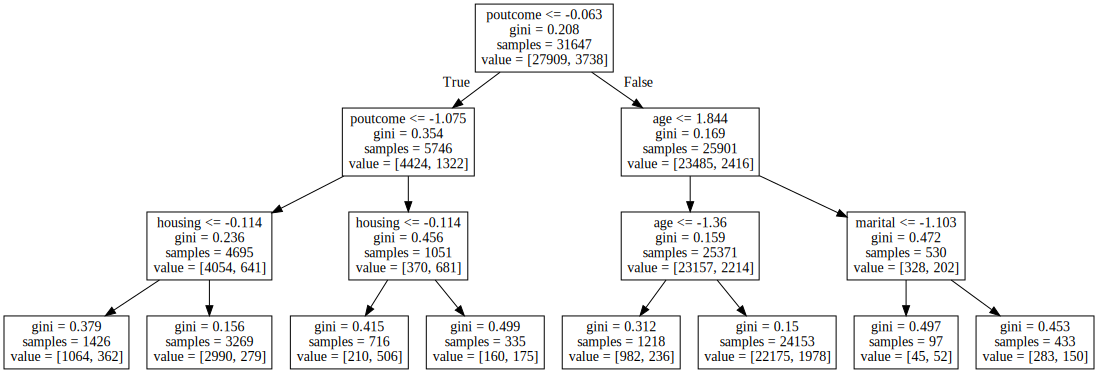

In [82]:
import graphviz

with open('dtreeR.dot') as f:
    tr_graph = f.read()
    
graphviz.Source(tr_graph)

In [84]:
f_imp = dtreeR.tree_.compute_feature_importances(normalize=False)

f_imp_dict = dict(zip(f_cols, dtreeR.feature_importances_))
f_imp_dict = pd.DataFrame.from_dict(f_imp_dict, orient='index')
f_imp_dict.sort_values(by=0).T

,default,balance,loan,campaign,marital,housing,age,poutcome
0,0.0,0.0,0.0,0.0,0.00694,0.087513,0.144473,0.761074


In [87]:
# Using BaggingClassifier

from sklearn.ensemble import BaggingClassifier
bagc = BaggingClassifier(base_estimator=dtree, n_estimators=500, random_state=1)

In [89]:
bagc.fit(X_train_scalar, y_train)
y_pred_bagc = bagc.predict(X_test_scalar)

In [90]:
print('------------Bagging------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_bagc)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_bagc))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_bagc))

------------Bagging------------

The accuracy score of this model is : 0.88

Confusion Matrix :

[[11615   398]
 [ 1224   327]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [91]:
# Using Adaptive Boosting

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50, random_state=1)

In [92]:
adb.fit(X_train_scalar, y_train)
y_pred_adb = adb.predict(X_test_scalar)

In [93]:
print('------------Adaptive Boosting------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_adb)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_adb))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_adb))

------------Adaptive Boosting------------

The accuracy score of this model is : 0.89

Confusion Matrix :

[[11885   128]
 [ 1310   241]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [94]:
# Using Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(n_estimators=100, random_state=1)

In [95]:
gdb.fit(X_train_scalar, y_train)
y_pred_gdb = gdb.predict(X_test_scalar)

In [96]:
print('------------Gradient Boosting------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_gdb)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_gdb))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_gdb))

------------Gradient Boosting------------

The accuracy score of this model is : 0.89

Confusion Matrix :

[[11889   124]
 [ 1307   244]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [97]:
# Using RandomForrest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=3, n_estimators=100, random_state=1)

In [98]:
rf.fit(X_train_scalar, y_train)
y_pred_rf = rf.predict(X_test_scalar)

In [99]:
print('------------Random Forrest------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_rf))

------------Random Forrest------------

The accuracy score of this model is : 0.88

Confusion Matrix :

[[11586   427]
 [ 1229   322]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.43      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [100]:
# Increasing n_estimators=500

rf1 = RandomForestClassifier(max_features=3, n_estimators=500, random_state=1)

In [101]:
rf1.fit(X_train_scalar, y_train)
y_pred_rf1 = rf1.predict(X_test_scalar)

In [102]:
print('------------Random Forrest with n_estimators=500 ------------\n')
print('The accuracy score of this model is : {:.2f}'.format(accuracy_score(y_test, y_pred_rf1)))
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test, y_pred_rf1))
print('\nClassification Report : \n')
print(classification_report(y_test, y_pred_rf1))

------------Random Forrest with n_estimators=500 ------------

The accuracy score of this model is : 0.88

Confusion Matrix :

[[11586   427]
 [ 1224   327]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.43      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



__Various Models & their resp. accuracies__

In [111]:
# Listing all the models and accuracy scores.

df_final = [('Logistic Regression', accuracy_score(y_test, y_pred_lr)),
           ('Naive Bayes', accuracy_score(y_test, y_pred_NB)),
           ('KNN', accuracy_score(y_test, y_pred_knn)),
           ('SVC', accuracy_score(y_test, y_pred_svc)),
           ('Bagging', accuracy_score(y_test, y_pred_bagc)),
           ('Ada Boost', accuracy_score(y_test, y_pred_adb)),
           ('Gradient Boost', accuracy_score(y_test, y_pred_gdb)),
           ('Random Forrest (n_estimator=100)', accuracy_score(y_test, y_pred_rf)),
           ('Random Forrest (n_estimator=500)', accuracy_score(y_test, y_pred_rf1))]

df_final = pd.DataFrame(df_final, columns=['Model', 'Accuracy'])
print('All the Models with Accuracy listed :')
df_final.sort_values(by='Accuracy', ascending=False)

All the Models with Accuracy listed :


,Model,Accuracy
6,Gradient Boost,0.894500
5,Ada Boost,0.893984
3,SVC,0.891551
0,Logistic Regression,0.885653
4,Bagging,0.880419
8,Random Forrest (n_estimator=500),0.878281
7,Random Forrest (n_estimator=100),0.877912
1,Naive Bayes,0.875700
2,KNN,0.873341


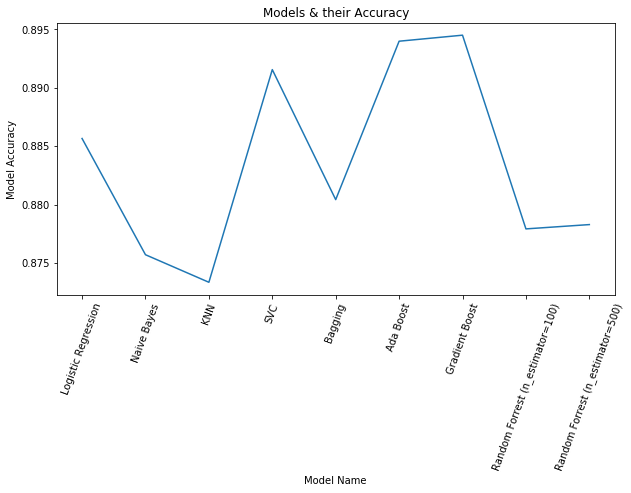

In [109]:
plt.figure(figsize=(10,5))
plt.plot(df_final['Model'], df_final['Accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Model Accuracy')
plt.title('Models & their Accuracy')
plt.xticks(rotation=70)
plt.show()

Summary of the analysis :
    
    Of all the ensemble models, Gradient Boosting performed on base estimator of Desicion Tree model performed the best with nearly 90% accuracy.
    
    The Ada Boost also gave a similar performance of around 89%.
    
    The various ensemble models havn't boosted the model accuracy by much.
    
    The SVC model gave an accuacy of 89%, which was the highest among all the classification models.
    
    There wasn't much difference among various models, generally all of them giving an accuracy between 87 to 89%.
    
    The outliers being replaced by mean hasn't had much of an impact on the model.